In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import math 
import os

import matplotlib.pyplot as plt

### Generate data for analysis

In [15]:
filename = os.listdir('../dash-2019-coronavirus/cumulative_data/')
sheet_name = [i.replace('.csv', '') for i in filename if i.endswith('.csv')]
dfs = {sheet_name: pd.read_csv('../dash-2019-coronavirus/cumulative_data/{}.csv'.format(sheet_name))
          for sheet_name in sheet_name}

In [16]:
DailyData = dfs[sheet_name[0]][['date_day']]
for region in sheet_name:
    #DailyData[region] = dfs[region]['New']
    DailyData.loc[:, region] = dfs[region].loc[:,'New']
DailyData.set_index('date_day', inplace=True)
DailyData = DailyData.sort_index()
# Remove the latest day as it is not compeleted
DailyData = DailyData.drop(DailyData.iloc[-1].name)

C:\Users\usuario\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\usuario\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
DailyData['China']

date_day
2020-01-21      0
2020-01-22     26
2020-01-23     11
2020-01-24      0
2020-01-25     15
             ... 
2020-04-24    659
2020-04-25    455
2020-04-26    226
2020-04-27     90
2020-04-28    222
Name: China, Length: 99, dtype: int64

In [18]:
DailyData.to_csv('DailyData.csv', index=True)

### Use fixed data

In [19]:
DailyData = pd.read_csv('./DailyData.csv', index_col=0)

In [20]:
DailyData

,Acre,Afghanistan,Africa,Alabama,Alagoas,Alaska,Albania,Alberta,Algeria,Amapá,...,Worldwide,Wyoming,Xinjiang,Yemen,Yokohama,Yukon,Yunnan,Zambia,Zhejiang,Zimbabwe
date_day,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0,0,1101,148,0,6,0,0,132,0,...,42787,0,0,0,0,0,0,0,0,0
2020-01-22,0,125,1464,118,0,4,24,216,135,0,...,64574,18,0,0,0,0,0,7,0,1
2020-01-23,0,172,1390,208,0,2,0,247,126,0,...,82557,11,0,0,0,0,0,4,0,0
2020-01-24,0,68,1272,187,0,0,14,216,129,0,...,86409,18,0,0,0,0,0,0,0,2
2020-01-25,0,184,1604,194,0,2,34,297,120,0,...,97384,20,0,0,0,0,1,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,7,0,0,0,89,0,0,0,0,85,...,662,0,1,0,0,0,6,0,42,0
2020-04-25,24,0,0,0,88,0,0,0,0,52,...,476,0,1,0,0,0,3,0,19,0
2020-04-26,21,0,0,0,53,0,0,0,0,113,...,227,0,0,0,0,0,0,0,16,0


### PCoA and K-mean clustering for growing pattern

In [21]:
# Only include coutries have cases more than 50
DailyDataFifty = DailyData[[i for i in DailyData.columns if DailyData[i].sum()>50]]

In [22]:
DailyDataFifty.shape

(99, 322)

In [23]:
# Data transformation to reduce the effect of data scale on pattern identification
# Square root transformation
DailyDataFiftyTrans = DailyDataFifty**0.5

In [24]:
# Normalisation column-wise
from sklearn import preprocessing

x = DailyDataFiftyTrans.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
DailyDataFiftyNorm = pd.DataFrame(x_scaled)
DailyDataFiftyNorm.columns = DailyDataFifty.columns

IndexError: index 49 is out of bounds for axis 0 with size 49

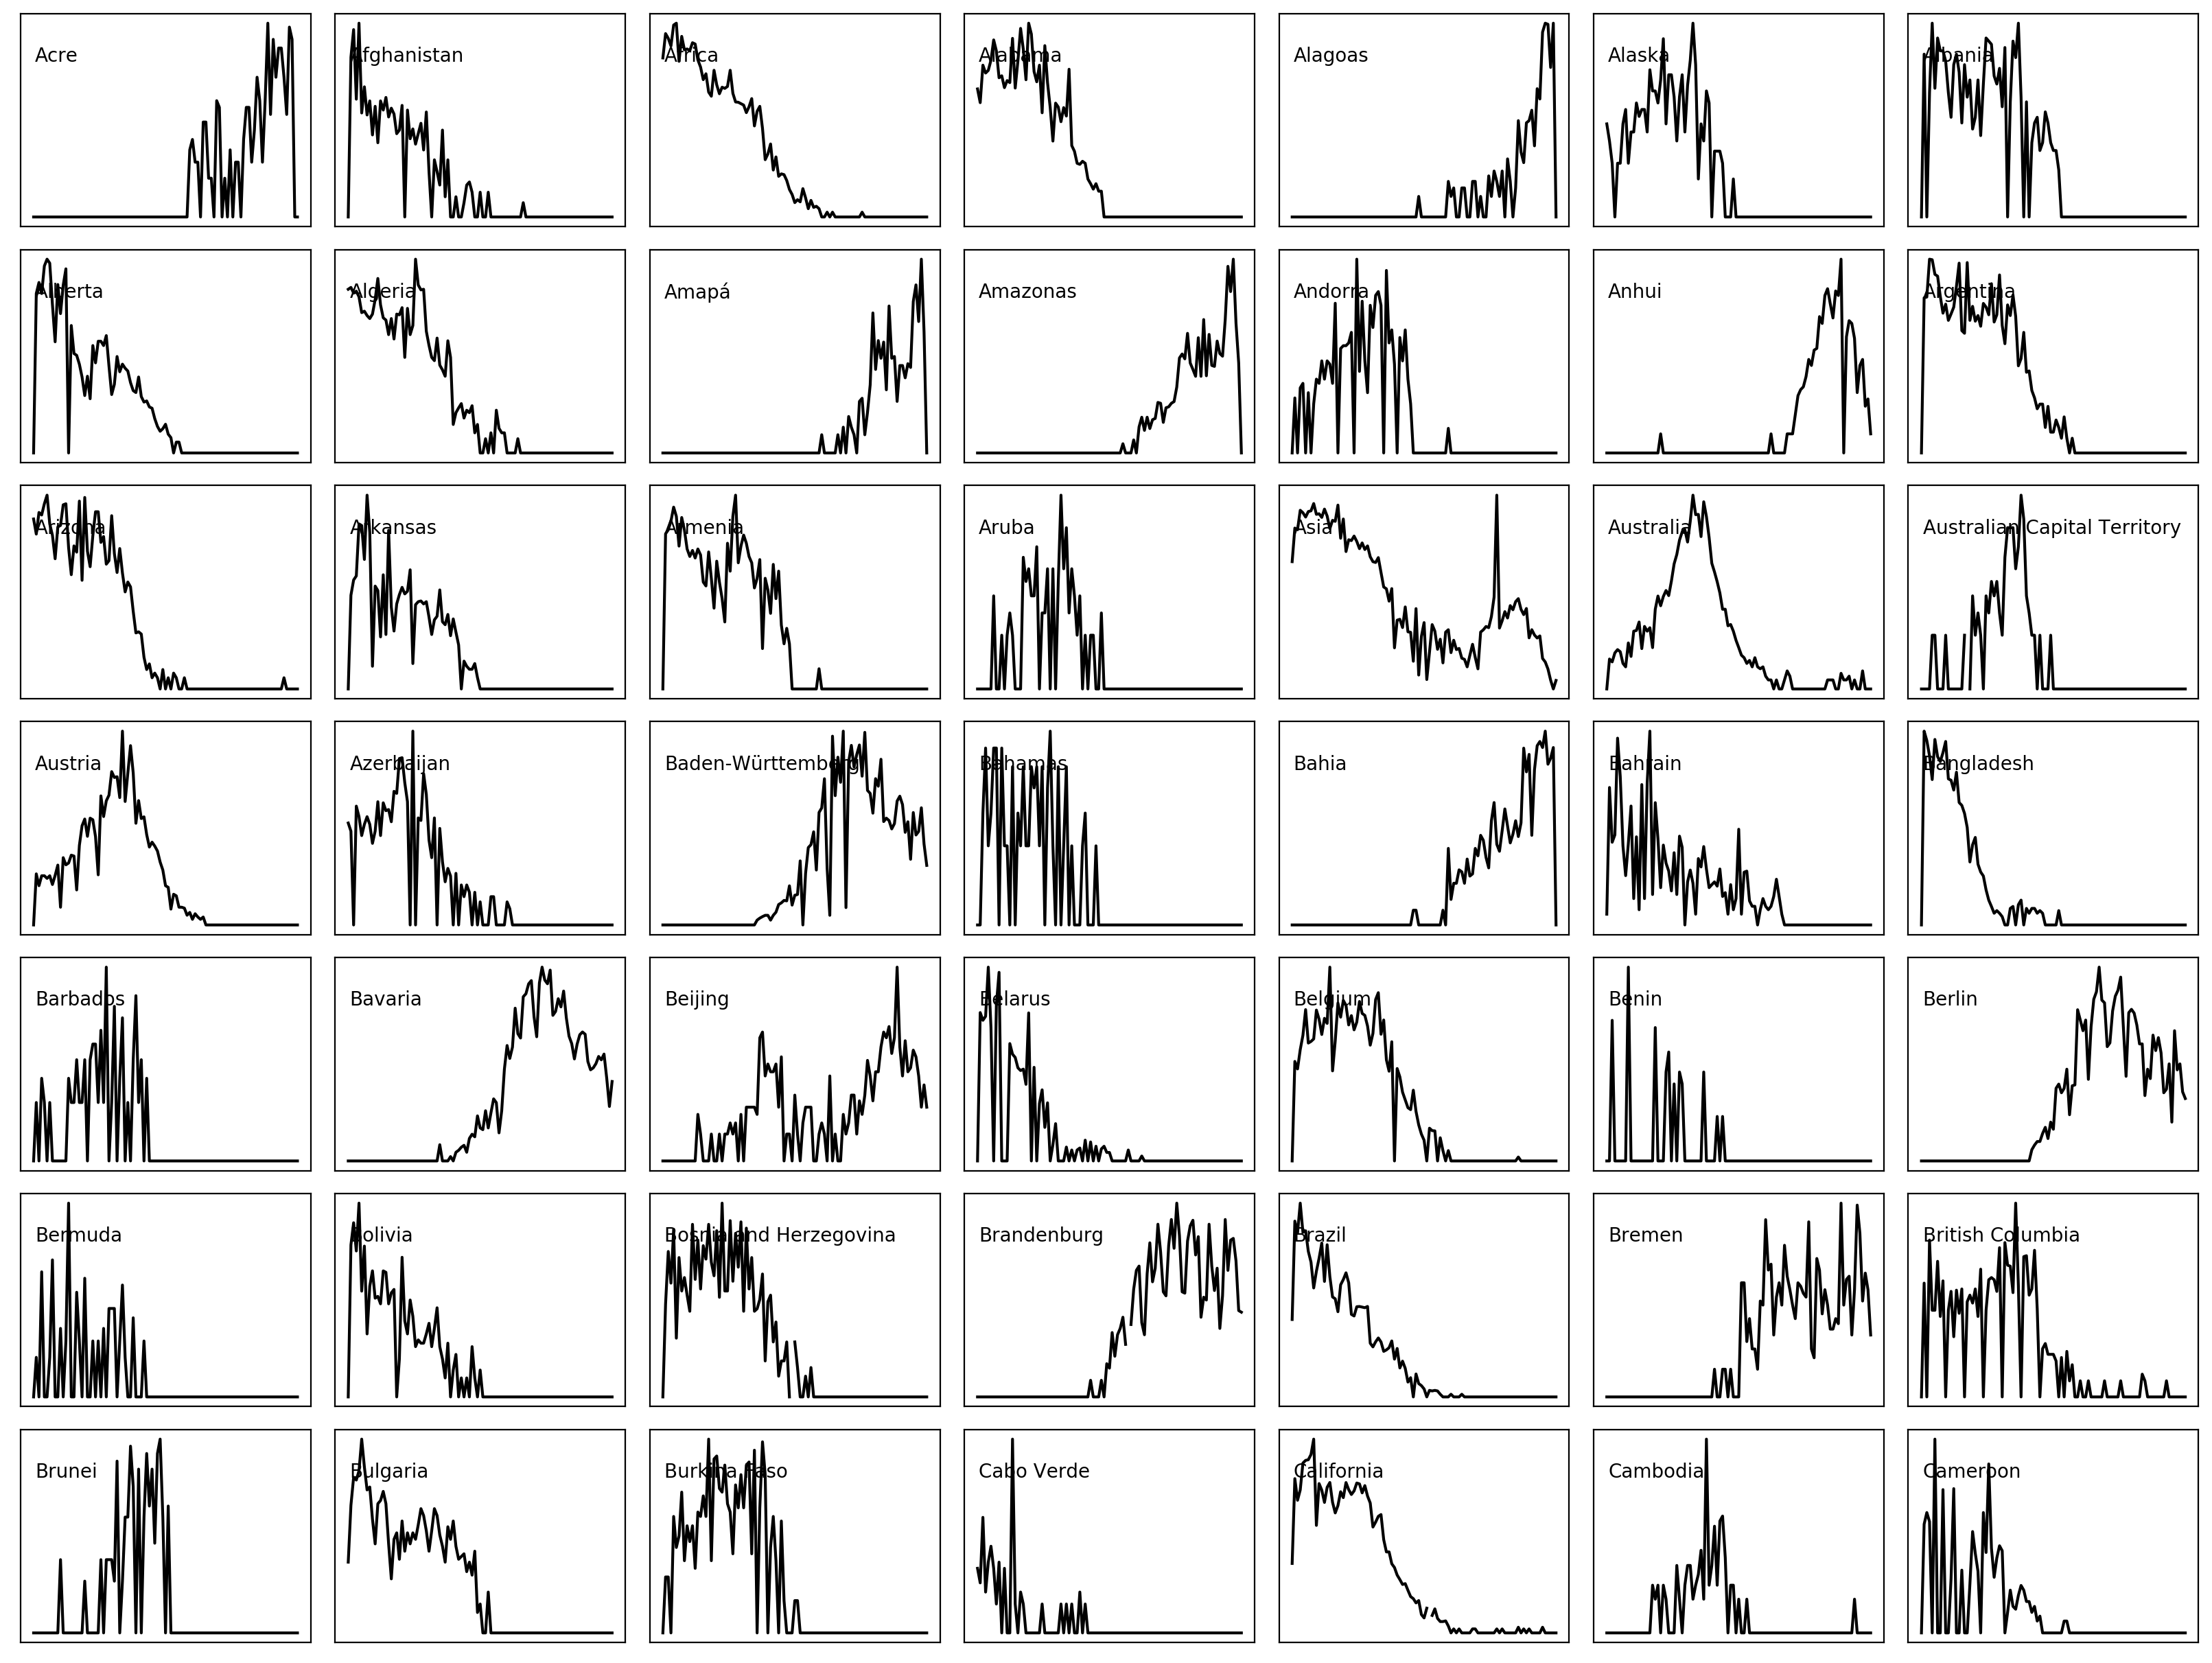

In [25]:
fig = plt.figure(figsize=(16,12), dpi=200, constrained_layout=True)

axs = fig.subplots(nrows=7, ncols=7)

for i in range(len(DailyDataFiftyNorm.columns)):
    axs.flat[i].plot(DailyDataFiftyNorm.index, DailyDataFiftyNorm.iloc[:,i], color='black')
    axs.flat[i].get_xaxis().set_ticks([])
    axs.flat[i].get_yaxis().set_ticks([])
    axs.flat[i].annotate(DailyDataFiftyNorm.iloc[:,i].name, (0.05, 0.8),xycoords='axes fraction', va='center', ha='left')

In [ ]:
#fig.savefig('pattern_uncluster2.png')

In [ ]:
def bray_curtis_distance(table, sample1_id, sample2_id):
    '''function to calculate bray-curtis distance'''
    numerator = 0
    denominator = 0
    sample1_counts = table[sample1_id]
    sample2_counts = table[sample2_id]
    for sample1_count, sample2_count in zip(sample1_counts, sample2_counts):
        numerator += abs(sample1_count - sample2_count)
        denominator += sample1_count + sample2_count
    return numerator / denominator

In [26]:
from skbio.stats.distance import DistanceMatrix
from numpy import zeros

def table_to_distances(table, pairwise_distance_fn):
    '''pairwise distance as a table'''
    sample_ids = table.columns
    num_samples = len(sample_ids)
    data = zeros((num_samples, num_samples))
    for i, sample1_id in enumerate(sample_ids):
        for j, sample2_id in enumerate(sample_ids[:i]):
            data[i,j] = data[j,i] = pairwise_distance_fn(table, sample1_id, sample2_id)
    return DistanceMatrix(data, sample_ids)

ModuleNotFoundError: No module named 'skbio'

In [27]:
# Produce a bray-curtis distance matrix
bc_dm = table_to_distances(DailyDataFiftyNorm, bray_curtis_distance)
print(bc_dm)

NameError: name 'table_to_distances' is not defined

In [28]:
# Using PCA on distance matrix and keep the first two components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(bc_dm.data)

NameError: name 'bc_dm' is not defined

In [29]:
# Variance explained by the first two components
print(pca.explained_variance_)

AttributeError: 'PCA' object has no attribute 'explained_variance_'

In [30]:
plt.figure(figsize=(12,12), dpi=100)

plt.scatter(projected[:, 0], projected[:, 1], s=100,
            alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')

for i, txt in enumerate(bc_dm.ids):
    plt.annotate(txt, (projected[:, 0][i], projected[:, 1][i]+0.02))

NameError: name 'projected' is not defined

<Figure size 1200x1200 with 0 Axes>

In [31]:
# Cluster countries using K-mean
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=5, random_state=0).fit(projected)
kmeans.labels_

NameError: name 'projected' is not defined

In [32]:
# Assign color to each cluster
color = []
for i in kmeans.labels_:
    if i == 3:
        color.append('#a6d96a')
    elif i == 0:
        color.append('#d7191c')
    elif i == 1:
        color.append('#2b83ba')
    elif i == 2:
        color.append('#1a9641')
    else:
        color.append('#fdae61')

NameError: name 'kmeans' is not defined

In [33]:
# Create a metadata table
clusterData = pd.DataFrame({'Cluster':kmeans.labels_,
                            'Region':bc_dm.ids,
                            'Color':color,
                            'Cases':[DailyDataFifty[i].sum() for i in bc_dm.ids],
                            'PC1':projected[:, 0],
                            'PC2':projected[:, 1],
                           },
                            )
clusterData

NameError: name 'kmeans' is not defined

In [34]:
# Re-assign cluster id as desired order
clusterData = clusterData.replace({'Cluster': {0: 9, 1: 7, 2:5, 3:6, 4:8}})
clusterData = clusterData.sort_values(by=['Cluster', 'Cases'], ascending=False)
clusterData = clusterData.reset_index(drop=True)
clusterData

NameError: name 'clusterData' is not defined

NameError: name 'clusterData' is not defined

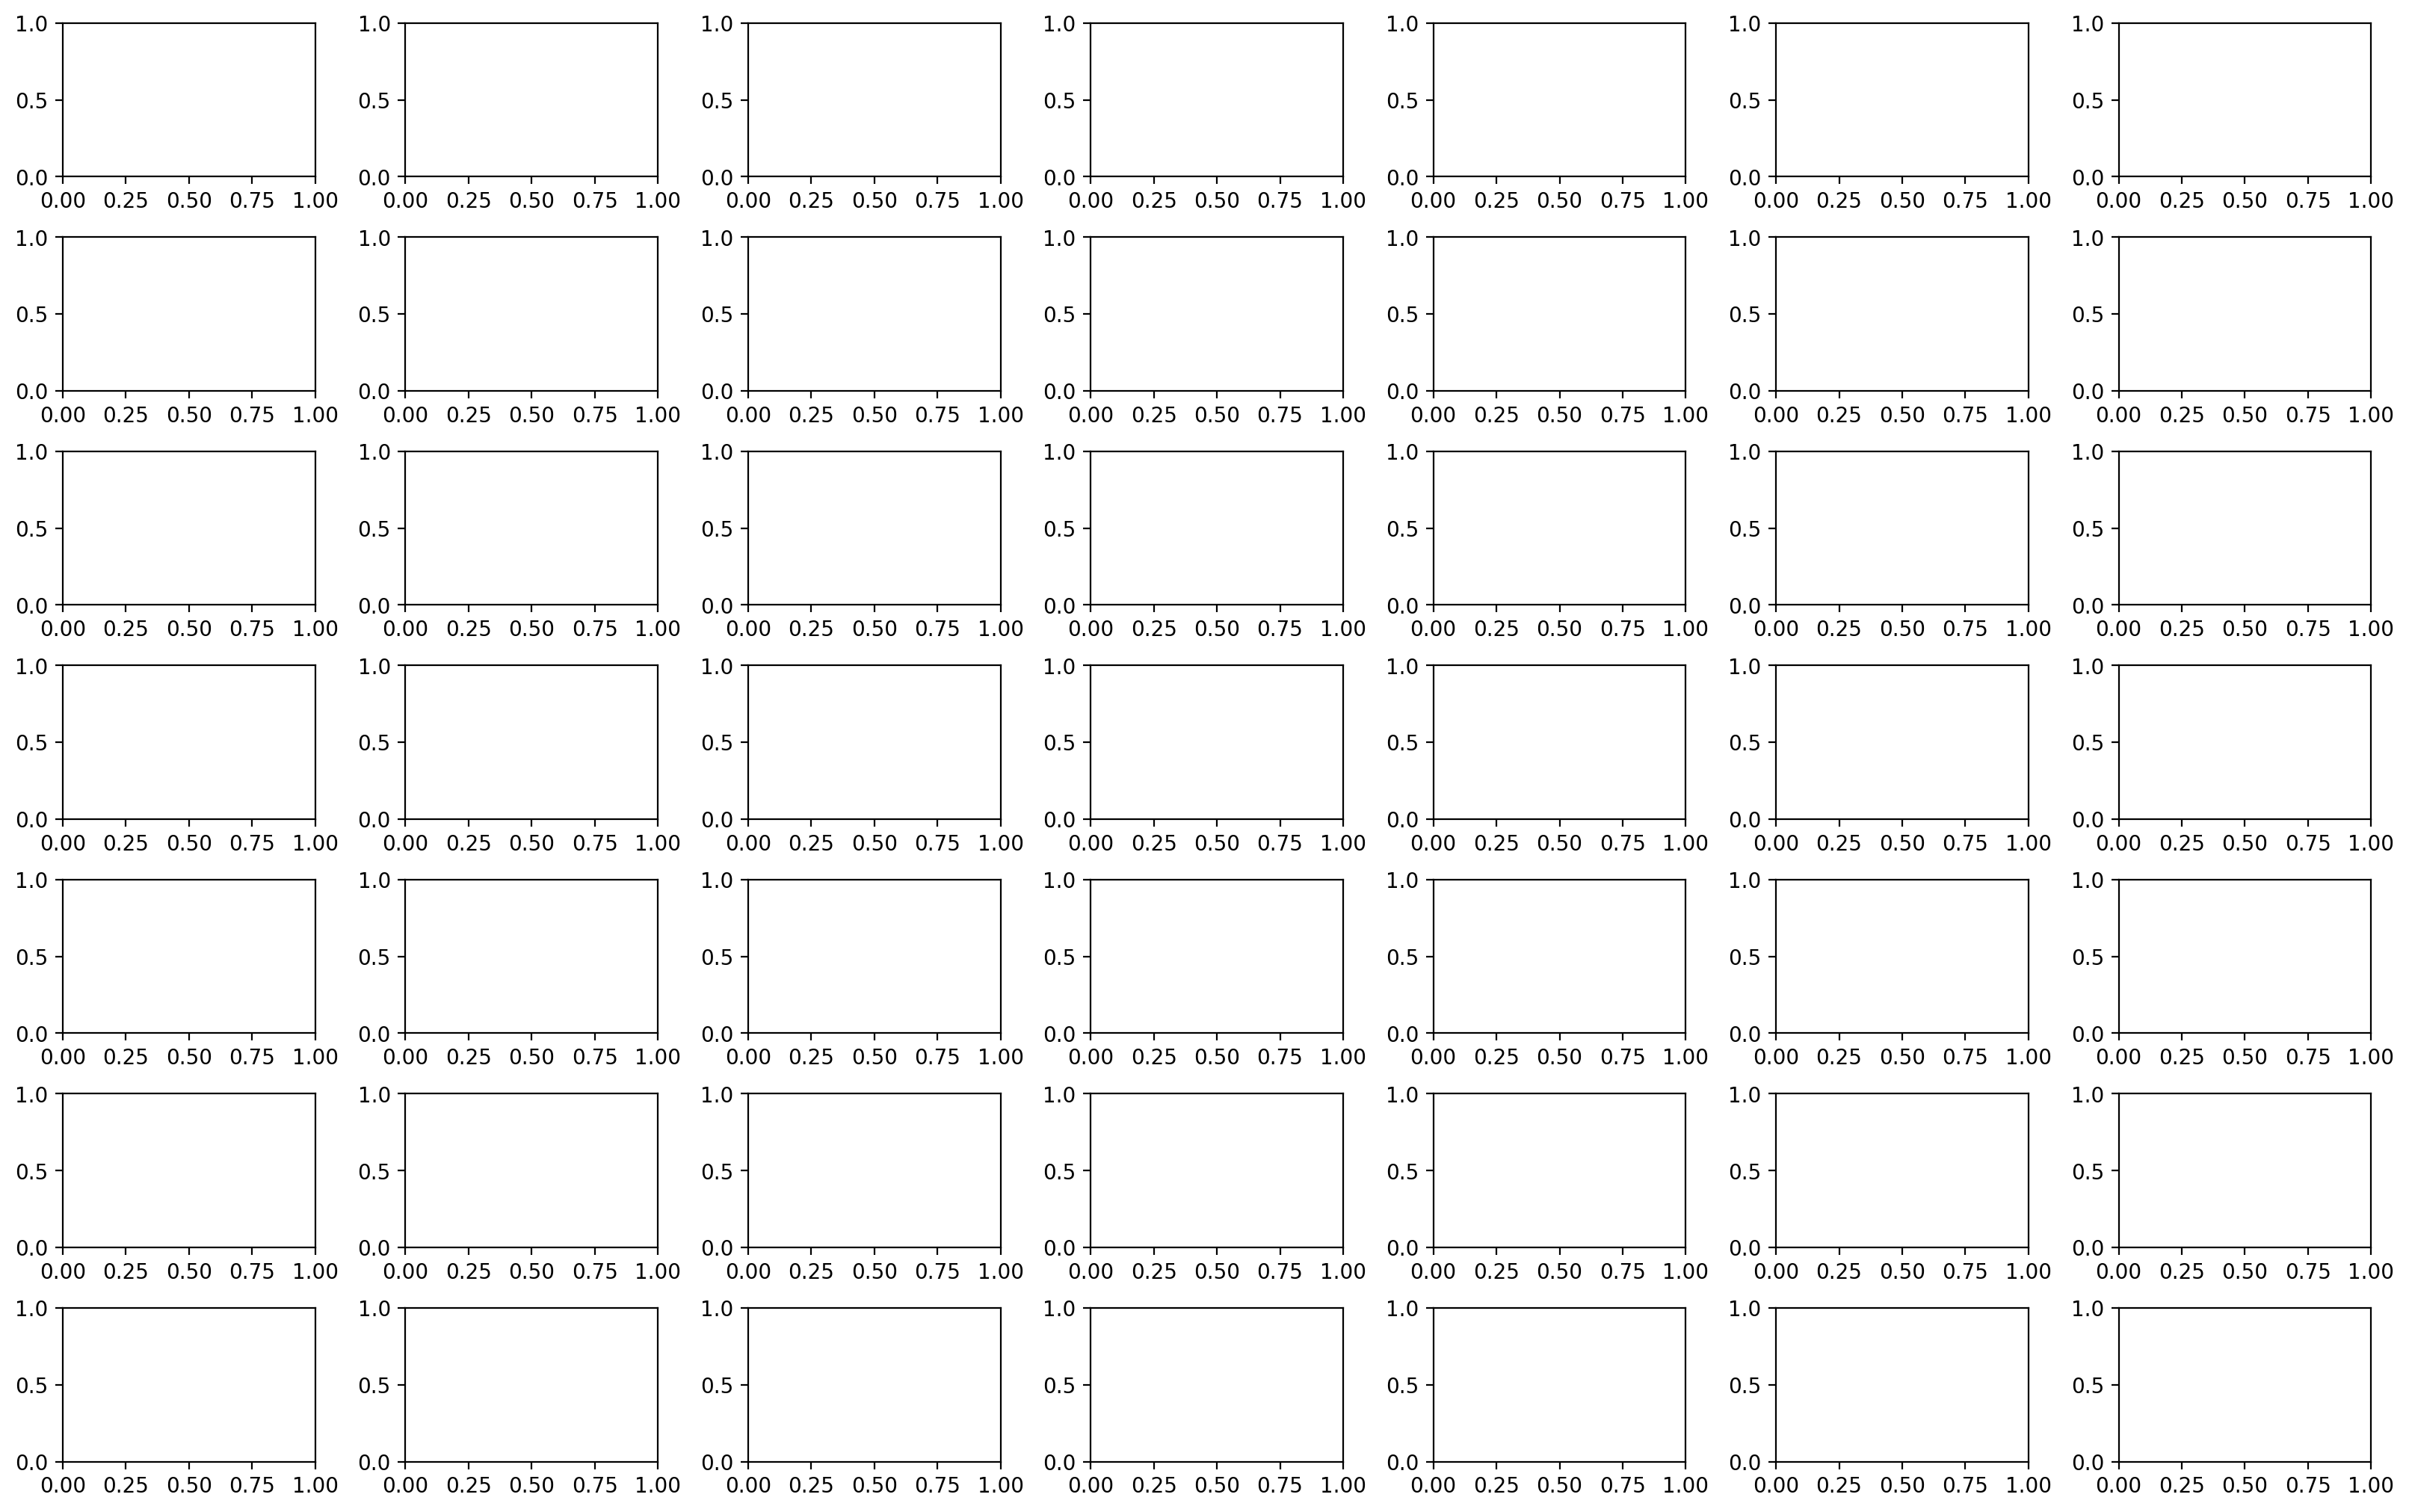

In [35]:
fig1 = plt.figure(figsize=(16,10), dpi=200, constrained_layout=True)

axs1 = fig1.subplots(nrows=7, ncols=7)

for order, i in clusterData.iterrows():          
        axs1.flat[order].plot(DailyDataFiftyNorm.index, DailyDataFiftyNorm[i['Region']], color=i['Color'])
        axs1.flat[order].get_xaxis().set_ticks([])
        axs1.flat[order].get_yaxis().set_ticks([])
        axs1.flat[order].annotate(i['Region'], (0.05, 0.8),xycoords='axes fraction', va='center', ha='left')


In [ ]:
fig2 = plt.figure(figsize=(16,10), dpi=200, constrained_layout=True)

axs2 = fig2.subplots(nrows=7, ncols=7)

for order, i in clusterData.iterrows():          
        axs2.flat[order].plot(DailyDataFiftyNorm.index, DailyDataFiftyNorm[i['Region']], color='black')
        axs2.flat[order].get_xaxis().set_ticks([])
        axs2.flat[order].get_yaxis().set_ticks([])
        axs2.flat[order].annotate(i['Region'], (0.05, 0.8), xycoords='axes fraction', va='center', ha='left')

In [ ]:
fig3 = plt.figure(figsize=(12,12), dpi=300)
ax1 = fig3.add_subplot()

ax1.scatter(clusterData['PC1'], clusterData['PC2'], c=clusterData['Color'], s=clusterData['Cases']/5,
            alpha=0.7)
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
#ax1.set_xlabel('PC1({:.2%} variance explaianed)'.format(pca.explained_variance_[0]))
#ax1.set_ylabel('PC2({:.2%} variance explaianed)'.format(pca.explained_variance_[1]))

for i, txt in enumerate(clusterData['Region']):
    ax1.annotate(txt, (clusterData['PC1'][i], clusterData['PC2'][i]+0.02))


In [ ]:
fig1.savefig('pattern_cluster.png')
fig2.savefig('pattern_uncluster.png')
fig3.savefig('pattern_PCoA.png', bbox_inches='tight')

### Confirmed vs. Recovered case animated plot

In [ ]:
# Import csv file and store each csv into a df list
filename = os.listdir('../dash-2019-coronavirus/raw_data/')
sheet_name2 = [i.replace('.csv', '') for i in filename if 'data' not in i and i.endswith('.csv')]
sheet_name2.sort(reverse=True)

In [36]:
# Obtain list of date
timeStampe = pd.DataFrame({'TimeTag': sheet_name2})
timeStampe['DateTime'] = [datetime.strptime(d, '%Y-%m-%d-%H-%M') for d in timeStampe['TimeTag']]
timeStampe['DateTime_AEDT'] = timeStampe['DateTime'] + timedelta(hours=16)
# Select the latest data from a given date
timeStampe['Date_AEDT']=[d.date() for d in timeStampe['DateTime_AEDT']]
timeStampe = timeStampe.groupby(by='Date_AEDT', sort=False).first()
timeList = timeStampe['TimeTag']

NameError: name 'sheet_name2' is not defined

In [37]:
dfs2 = {sheet_name: pd.read_csv('../dash-2019-coronavirus/raw_data/{}.csv'.format(sheet_name))
          for sheet_name in timeList}

for key, df in dfs2.items():
    dfs2[key].loc[:,'Confirmed'].fillna(value=0, inplace=True)
    dfs2[key].loc[:,'Deaths'].fillna(value=0, inplace=True)
    dfs2[key].loc[:,'Recovered'].fillna(value=0, inplace=True)
    dfs2[key]=dfs2[key].astype({'Confirmed':'int64', 'Deaths':'int64', 'Recovered':'int64'})
    # Change as China for coordinate search
    dfs2[key]=dfs2[key].replace({'Country/Region':'Mainland China'}, 'China')
    # Add a zero to the date so can be convert by datetime.strptime as 0-padded date
    dfs2[key]['Last Update'] = '0' + dfs2[key]['Last Update']
    # Convert time as Australian eastern daylight time
    dfs2[key]['Date_last_updated_AEDT'] = [datetime.strptime(d, '%m/%d/%Y %H:%M') for d in dfs2[key]['Last Update']]
    dfs2[key]['Date_last_updated_AEDT'] = dfs2[key]['Date_last_updated_AEDT'] + timedelta(hours=16)
    dfs2[key]['Date_last_updated_AEDT'] = [d.date() for d in dfs2[key]['Date_last_updated_AEDT']]
    dfs2[key] = dfs2[key].drop(['Last Update'], axis=1)
    dfs2[key] = dfs2[key].groupby(by='Country/Region', sort=False).sum()

NameError: name 'timeList' is not defined

In [38]:
dfs2[timeList[-8]]

NameError: name 'dfs2' is not defined

### Growth curves

In [39]:
RegionList = clusterData[clusterData['Cluster'] == 9]['Region']

NameError: name 'clusterData' is not defined

In [40]:
dfs_cumulative = {sheet_name: pd.read_csv('../dash-2019-coronavirus/cumulative_data/{}.csv'.format(sheet_name))
          for sheet_name in RegionList}

NameError: name 'RegionList' is not defined

In [41]:
for region in RegionList:
    dfs_cumulative[region] = dfs_cumulative[region].sort_values(by='date_day')

NameError: name 'RegionList' is not defined

NameError: name 'RegionList' is not defined

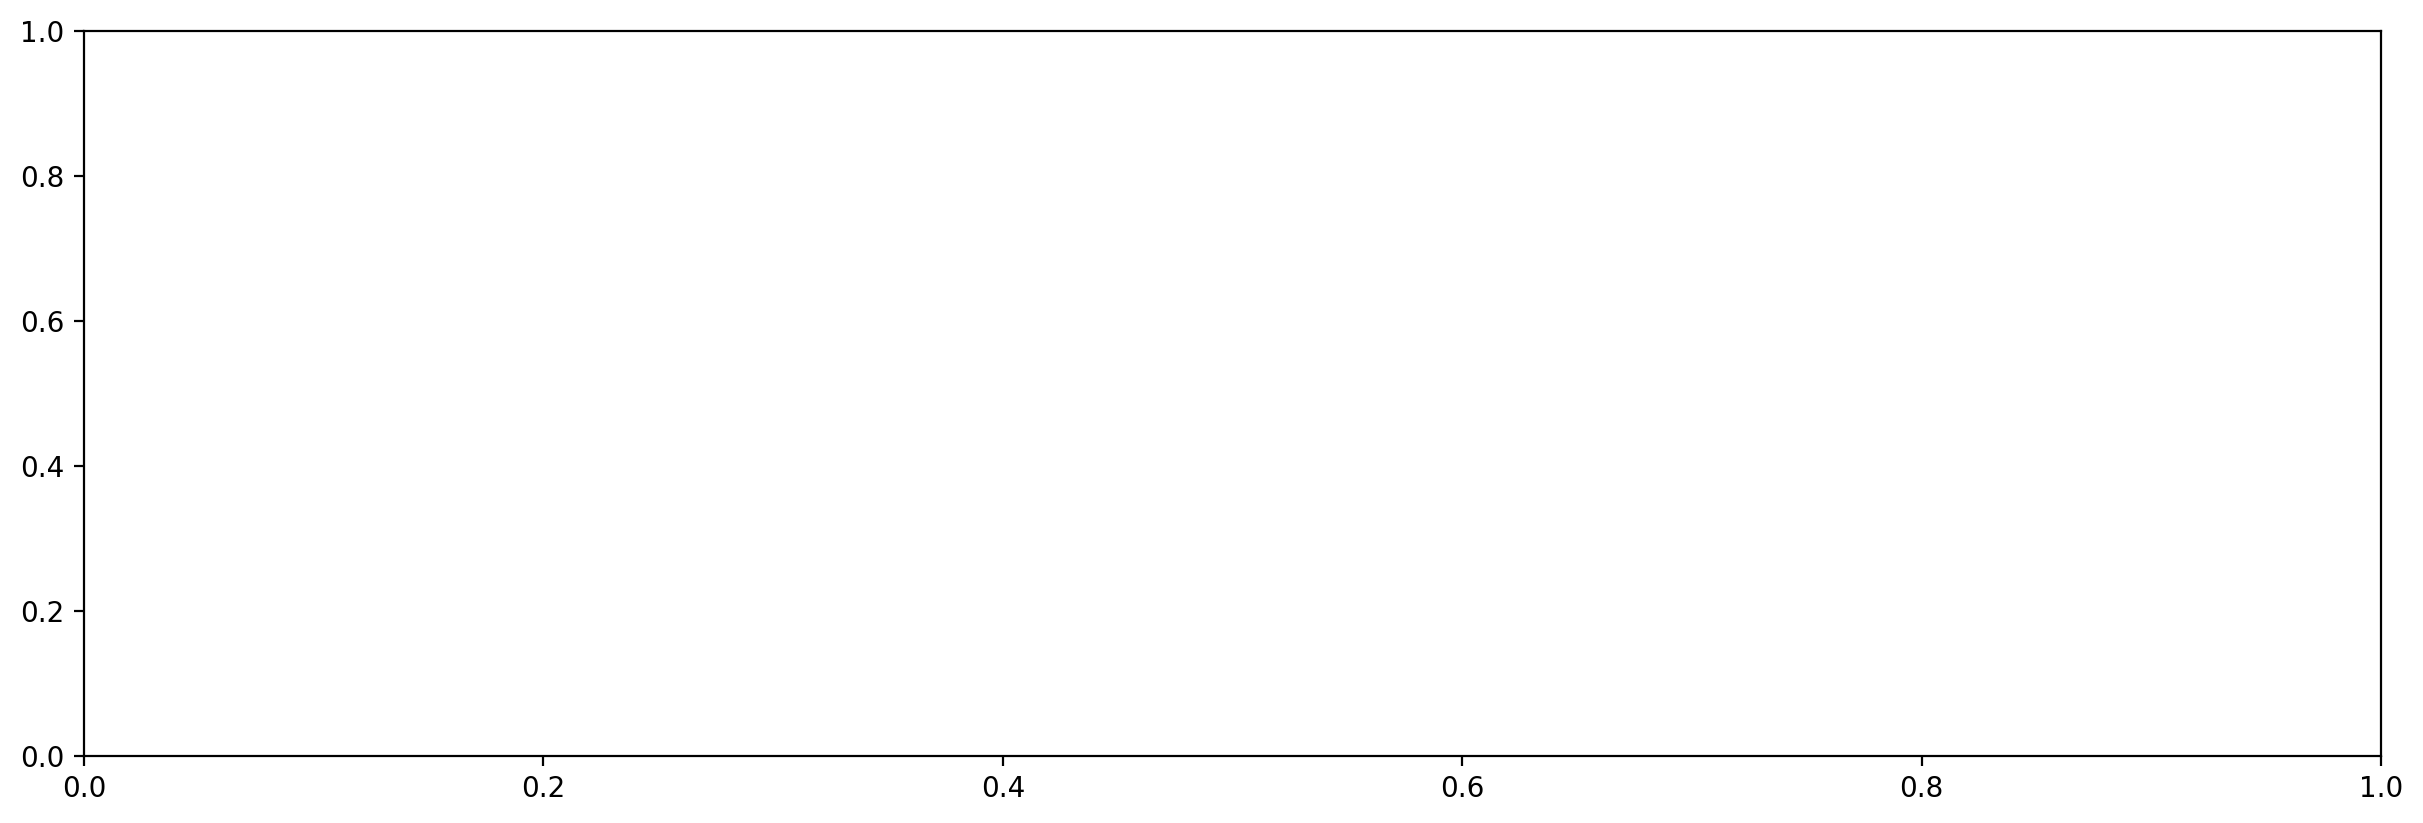

In [42]:
fig4 = plt.figure(figsize=(12,4), dpi=200, constrained_layout=True)
ax2 = fig4.subplots()
for region in RegionList:
    ax2.plot(dfs_cumulative[region][dfs_cumulative[region]['Confirmed']>50].date_day, 
             dfs_cumulative[region][dfs_cumulative[region]['Confirmed']>50].Confirmed)
    ax2.annotate(region, 
                 xy=(list(dfs_cumulative[region][dfs_cumulative[region]['Confirmed']>50].date_day)[0],
                 list(dfs_cumulative[region][dfs_cumulative[region]['Confirmed']>50].Confirmed)[0])
                )

ax2.set_yscale('log')
plt.xticks(rotation=70)
#axs1.flat[order].get_xaxis().set_ticks([])
#axs1.flat[order].get_yaxis().set_ticks([])
#axs1.flat[order].annotate(i['Region'], (0.05, 0.8),xycoords='axes fraction', va='center', ha='left')

In [ ]:
list(dfs_cumulative['Italy'][dfs_cumulative[region]['Confirmed']>50].date_day)[-1]